<a href="https://colab.research.google.com/github/ROARMarketingConcepts/Machine-Learning-Projects/blob/master/Black_Friday_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Black Friday Dataset - Data Regression Problem

Performed by
Ken Wood

ROAR Marketing Concepts LLC

ken@roarmarketingconcepts.com


### We will apply three sklearn regression models to the Black Friday dataset.  They are the LinearRegression, DecisionTreeRegressor, and RandomForestRegressor.  We will train each model on 80% of the Black Friday dataset and use the remaining 20% for test.  Our metric for gauging a model's effectiveness is the Root Mean Square Error (RMSE) of the model predictions $\hat{y}$, as compared with the actual label values $y$ (Purchase).

### Mount my Google Drive where the BlackFriday.csv dataset is located...

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Install some necessary packages to perform the required analysis...

In [0]:
!pip install -U scikit-learn
!pip install --user --upgrade tables
import pandas as pd
import numpy as np
import sklearn
import scipy

import matplotlib.pyplot as plt
from matplotlib import interactive
plt.rc("font", size=14)
from pylab import scatter, show, legend, xlabel, ylabel

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.2)
Requirement already up-to-date: tables in /usr/local/lib/python3.6/dist-packages (3.4.4)


### Load the Black Friday dataset...

In [0]:
bf_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Black Friday Dataset/BlackFriday.csv')
bf_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Let's look at some properties of the Black Friday dataset...

In [0]:
bf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [0]:
bf_data['Product_ID'].value_counts()

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00059442    1384
P00145042    1384
P00237542    1374
P00255842    1354
P00117942    1346
P00110942    1336
P00010742    1331
P00110842    1260
P00220442    1253
P00051442    1233
P00102642    1228
P00117442    1227
P00278642    1213
P00242742    1194
P00034742    1188
P00080342    1186
P00148642    1179
P00028842    1172
P00031042    1168
P00251242    1167
P00114942    1162
P00270942    1141
             ... 
P00012342       1
P00357542       1
P00291642       1
P00352042       1
P00106342       1
P00074842       1
P00056342       1
P00074742       1
P00070142       1
P00204442       1
P00065142       1
P00312542       1
P00013842       1
P00167242       1
P00132742       1
P00339142       1
P00206942       1
P00068342       1
P00056542       1
P00104342       1
P00228842       1
P00300742       1
P00053242       1
P00285142       1
P00062342 

### Notice that the number of male shoppers in nearly 4x the number of female shoppers!

In [0]:
bf_data['Gender'].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

In [0]:
bf_data['Age'].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [0]:
bf_data['City_Category'].value_counts()

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

In [0]:
bf_data['Stay_In_Current_City_Years'].value_counts()

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

### Let's check for missing values.

In [0]:
bf_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

### Info about products

In [0]:
print('Number of products:',bf_data['Product_ID'].nunique())
print('Number of categories:',bf_data['Product_Category_1'].unique().max())
print('Highest and lowest purchase:',
      bf_data['Purchase'].max(),',',bf_data['Purchase'].min())

Number of products: 3623
Number of categories: 18
Highest and lowest purchase: 23961 , 185


### Info about shoppers

In [0]:
print('Number of shoppers:',bf_data['User_ID'].nunique())
print('Years in city:',bf_data['Stay_In_Current_City_Years'].unique())
print('Age Groups:',bf_data['Age'].unique())

Number of shoppers: 5891
Years in city: ['2' '4+' '3' '1' '0']
Age Groups: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


Lets see how much each gender spent per individual:

In [0]:
count_male = bf_data[bf_data['Gender']=='M'].count()[0]
count_female = bf_data[bf_data['Gender']=='F'].count()[0]

print('Female Purchases:',round(bf_data[bf_data['Gender']=='F']['Purchase'].sum()/count_female,3))
print('Male Purchases:',round(bf_data[bf_data['Gender']=='M']['Purchase'].sum()/count_male,3))

Female Purchases: 8809.761
Male Purchases: 9504.772


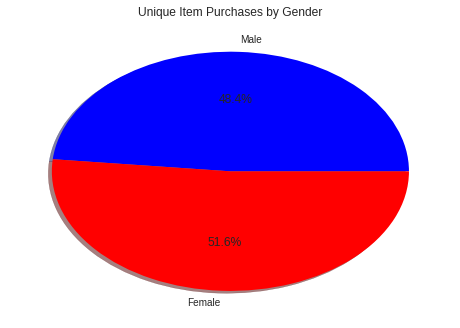

In [0]:
plt.pie(bf_data.groupby('Gender')['Product_ID'].nunique(),labels=['Male','Female'],
       shadow=True, autopct='%1.1f%%',colors=['blue','red'])
plt.title('Unique Item Purchases by Gender')
plt.show()

In [0]:
# Individual groupby dataframes for each gender
gb_gender_m = bf_data[bf_data['Gender']=='M'][['Product_Category_1','Gender']].groupby(by='Product_Category_1').count()
gb_gender_f = bf_data[bf_data['Gender']=='F'][['Product_Category_1','Gender']].groupby(by='Product_Category_1').count()

# Concatenate and change column names
cat_bygender = pd.concat([gb_gender_m,gb_gender_f],axis=1)
cat_bygender.columns = ['M ratio','F ratio']

# Adjust to reflect ratios
cat_bygender['M ratio'] = cat_bygender['M ratio']/bf_data[bf_data['Gender']=='M'].count()[0]
cat_bygender['F ratio'] = cat_bygender['F ratio']/bf_data[bf_data['Gender']=='F'].count()[0]

# Create likelihood of one gender to buy over the other
cat_bygender['Likelihood (M/F)'] = cat_bygender['M ratio']/cat_bygender['F ratio']

cat_bygender['Total Ratio'] = cat_bygender['M ratio']+cat_bygender['F ratio']

In [0]:
cat_bygender.sort_values(by='Likelihood (M/F)',ascending=False)

,M ratio,F ratio,Likelihood (M/F),Total Ratio
Product_Category_1,,,,
17,0.001248,0.000461,2.705079,0.001710
18,0.006658,0.002844,2.340854,0.009502
15,0.012778,0.007738,1.651252,0.020517
9,0.000824,0.000530,1.555993,0.001353
1,0.281099,0.184581,1.522908,0.465680
11,0.047612,0.035243,1.350972,0.082855
6,0.038702,0.033851,1.143303,0.072553
10,0.009606,0.008608,1.115868,0.018214
2,0.044220,0.042157,1.048947,0.086377


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


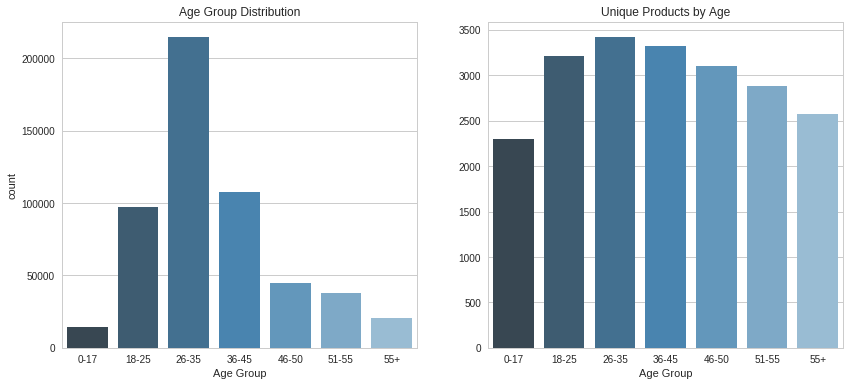

In [0]:
prod_byage = bf_data.groupby('Age').nunique()['Product_ID']

fig,ax = plt.subplots(1,2,figsize=(14,6))
ax = ax.ravel()

sns.countplot(bf_data['Age'].sort_values(),ax=ax[0], palette="Blues_d")
ax[0].set_xlabel('Age Group')
ax[0].set_title('Age Group Distribution')
sns.barplot(x=prod_byage.index,y=prod_byage.values,ax=ax[1], palette="Blues_d")
ax[1].set_xlabel('Age Group')
ax[1].set_title('Unique Products by Age')

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


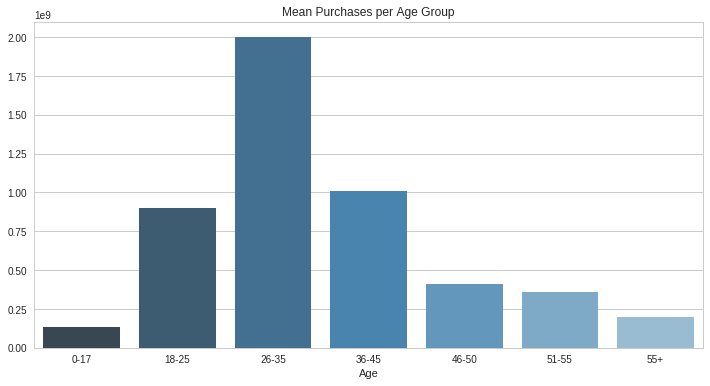

In [0]:
spent_byage = bf_data.groupby(by='Age').sum()['Purchase']
plt.figure(figsize=(12,6))

sns.barplot(x=spent_byage.index,y=spent_byage.values, palette="Blues_d")
plt.title('Mean Purchases per Age Group')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


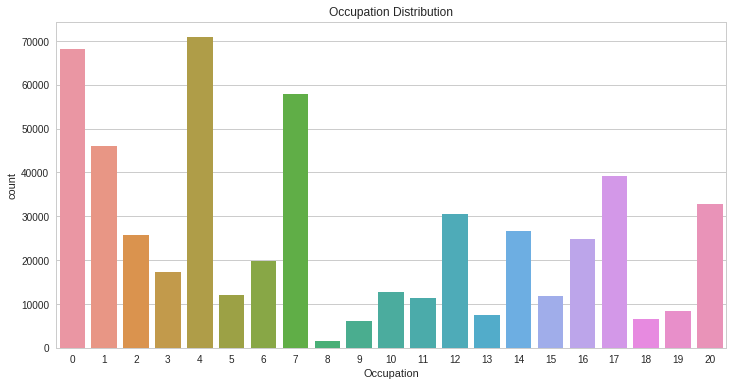

In [0]:
plt.figure(figsize=(12,6))
sns.countplot(bf_data['Occupation'])
plt.title('Occupation Distribution')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


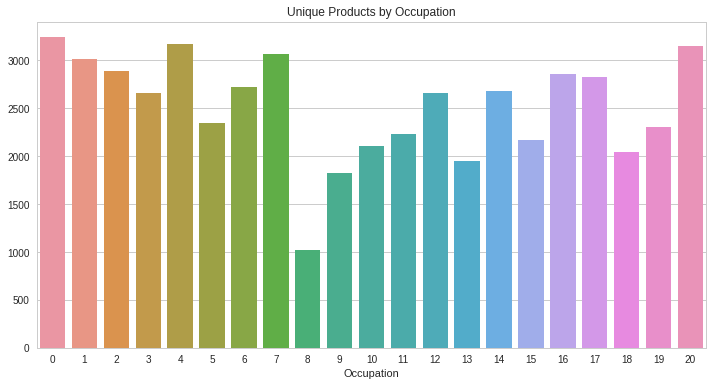

In [0]:
plt.figure(figsize=(12,6))
prod_by_occ = bf_data.groupby(by='Occupation').nunique()['Product_ID']

sns.barplot(x=prod_by_occ.index,y=prod_by_occ.values)
plt.title('Unique Products by Occupation')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


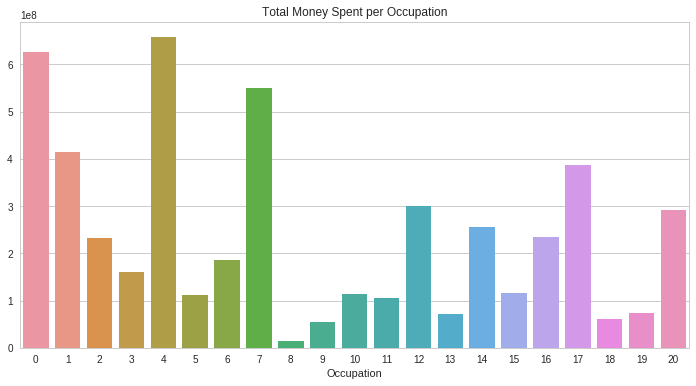

In [0]:
spent_by_occ = bf_data.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(12,6))

sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent per Occupation')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


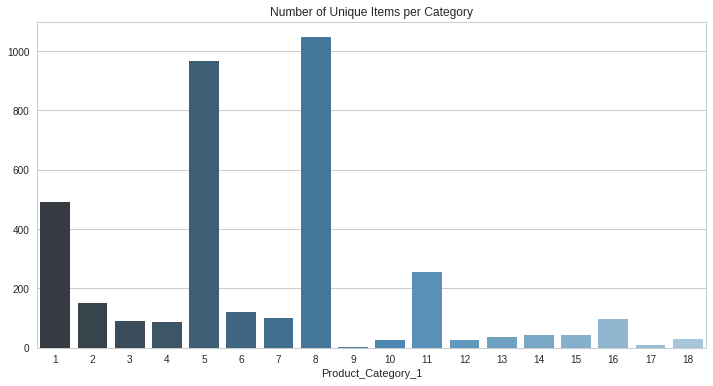

In [0]:
plt.figure(figsize=(12,6))
prod_by_cat = bf_data.groupby('Product_Category_1')['Product_ID'].nunique()

sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values, palette="Blues_d")
plt.title('Number of Unique Items per Category')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


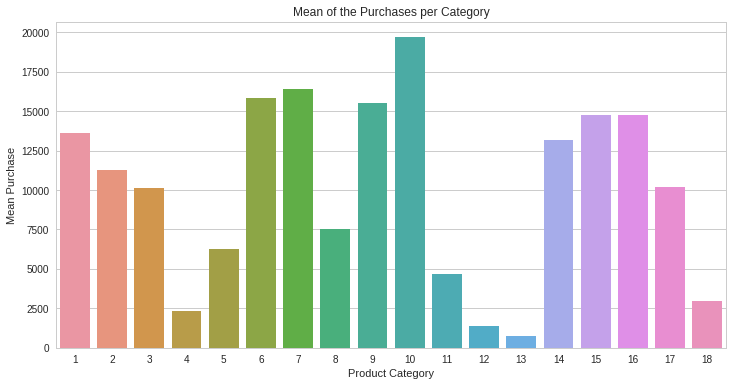

In [0]:
category = []
mean_purchase = []


for i in bf_data['Product_Category_1'].unique():
    category.append(i)
category.sort()

for e in category:
    mean_purchase.append(bf_data[bf_data['Product_Category_1']==e]['Purchase'].mean())

plt.figure(figsize=(12,6))

sns.barplot(x=category,y=mean_purchase)
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()

### Estimate of price and quantity of purchase 

Since the Purchases feature alludes to how much a customer paid for an unknown amount of a certain item, let's make a bold assumption that the lowest purchase paid by product is the price of said item:

In [0]:
# Dictionary of product IDs with minimum purchase

prod_prices = bf_data.groupby('Product_ID').min()['Purchase'].to_dict()

Now, the purchase value for each item ID is grouped by what one could assume is the amount of items purchased. Then, the prices and quantities calculated below are an estimate, but it is a very good one:

In [0]:
print(prod_prices.keys)

<built-in method keys of dict object at 0x7efc8413e090>


### Correlation matrix for target variable $y$, 'Purchase'.

In [0]:
corr_matrix = bf_data.corr()
corr_matrix['Purchase'].sort_values(ascending = False)

Purchase              1.000000
Occupation            0.021104
User_ID               0.005389
Marital_Status        0.000129
Product_Category_3   -0.022257
Product_Category_2   -0.209973
Product_Category_1   -0.314125
Name: Purchase, dtype: float64

### Non-numerical (categorical) variables that will need to be numerically coded are:


*   Product_ID
*   Gender
*   Age
*   City_Category
*   Stay_In_Current_City_Years




### Let's separate the Black Friday dataset into the independent variable matrix 'X' and dependent variable 'y'.

In [0]:
X = bf_data.drop('Purchase',axis=1)
y = bf_data['Purchase']

Lets get some stats on the target variable, $y$, which has a label of purchase.

In [0]:
y.describe()

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64

### Now, let's separate the numerical and categorical variables so that we can perform data preparation techniques on each variable type.

In [0]:
def separate_num_cat(dataset):
  num_cols = [col for col in dataset.columns if col not in ['Product_ID','Gender','Age','City_Category','Stay_In_Current_City_Years']]
  cat_cols = [col for col in dataset.columns if col in ['Product_ID','Gender','Age','City_Category','Stay_In_Current_City_Years']]
  dataset_num = dataset[num_cols]
  dataset_cat = dataset[cat_cols]
  # dataset_num = dataset_num.drop('Purchase',axis=1)  # Remove the target variable column in dataset_num                
  
  return dataset_num,dataset_cat

In [0]:
X_num,X_cat = separate_num_cat(X)

### Let's code the categorical variables into One Hot Vectors using sklearn's 'OrdinalEncoder' and 'OneHotEncoder' functions...

In [0]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
ordinal_encoder = OrdinalEncoder()
one_hot_encoder = OneHotEncoder(categories='auto')

In [0]:
def transform_cat_feature(dataset,cat_column_label):
  dataset_cat_column_label = dataset[cat_column_label].values.reshape(-1,1)
  dataset_cat_column_label_encoded = ordinal_encoder.fit_transform(dataset_cat_column_label)
  dataset_cat_column_label_1hot = one_hot_encoder.fit_transform(dataset_cat_column_label_encoded.reshape(-1,1))
  return dataset_cat_column_label_1hot

In [0]:
X_productid_1hot = transform_cat_feature(X,'Product_ID')
X_gender_1hot = transform_cat_feature(X,'Gender')
X_age_1hot = transform_cat_feature(X,'Age')
X_city_category_1hot = transform_cat_feature(X,'City_Category')
X_stay_in_current_city_years_1hot = transform_cat_feature(X,'Stay_In_Current_City_Years')

X_productid_1hot,X_gender_1hot,X_age_1hot,X_city_category_1hot,X_stay_in_current_city_years_1hot

(<537577x3623 sparse matrix of type '<class 'numpy.float64'>'
 	with 537577 stored elements in Compressed Sparse Row format>,
 <537577x2 sparse matrix of type '<class 'numpy.float64'>'
 	with 537577 stored elements in Compressed Sparse Row format>,
 <537577x7 sparse matrix of type '<class 'numpy.float64'>'
 	with 537577 stored elements in Compressed Sparse Row format>,
 <537577x3 sparse matrix of type '<class 'numpy.float64'>'
 	with 537577 stored elements in Compressed Sparse Row format>,
 <537577x5 sparse matrix of type '<class 'numpy.float64'>'
 	with 537577 stored elements in Compressed Sparse Row format>)

### Notice that the outputs are SciPy sparse matrices, instead of a NumPy arrays. 

This is very useful when we have categorical attributes with thousands of categories. After one-hot encoding we get a matrix with thousands of columns, and the matrix is full of zeros except for a single 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead, a sparse matrix only stores the location of the nonzero elements. We can use it mostly like a normal 2D array,

### Now, let's apply standard scaling to the numerical variables.  This includes imputing the median for all missing values.  Not sure if this is the right thing to do, but we can always change it later.

In [0]:
X_num_attribs = list(X_num) 
X_num_attribs

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [0]:

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [0]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

X_num_tr = num_pipeline.fit_transform(X_num)

### Recall the label names of the OneHotEncoded categorical variables...

In [0]:
X_cat_attribs = ['Product_ID','Gender','Age','City_Category','Stay_In_Current_City_Years'] 
X_cat_attribs

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

### Now it would be nice if we could feed a Pandas DataFrame containing both numerical and non-numerical coded columns directly into our pipeline, instead of having to first manually extract the numerical columns into a NumPy array. Now we can use the recently-introduced sklearn function **'ColumnTransformer'** to do this work for us.

In [0]:
from sklearn.compose import ColumnTransformer


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, X_num_attribs),
        ("cat", OneHotEncoder(), X_cat_attribs),
    ])

X_prepared = full_pipeline.fit_transform(X)

### We will now shuffle the dataset rows and define the train and test sets. The train-test split will be 80% - 20%

In [0]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_prepared,y,test_size=0.2,random_state=42)

## Now we are ready to train some models!!

### Let's first look at a Linear Regression....

In [0]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression() 
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let’s measure this regression model’s **RMSE** on the training and test sets using **Scikit-Learn’s mean_squared_error function**:

In [0]:
from sklearn.metrics import mean_squared_error

def Calculate_RMSE(X,y,model):
  predictions = model.predict(X)
  lin_mse = mean_squared_error(y,predictions)
  lin_rmse = np.sqrt(lin_mse)
  return lin_rmse

In [0]:
Calculate_RMSE(X_train,y_train,lin_reg)

2652.01099492523

In [0]:
Calculate_RMSE(X_test,y_test,lin_reg)

2677.6907488552465

### Wow, the RMSE is pretty high for both the training and test sets! The linear regression algorithm is most likely *underfitting* the dataset. 

In [0]:
some_predictions = lin_reg.predict(X_train[:30])
some_labels = y_train[:30]
    
print(some_predictions,'\n\n',some_labels)

[ 6799.96035853 12127.74531091  7297.34719445 15027.37680851
 12447.5434375  10691.06048926  7822.589656    6590.91887052
  6242.19044876  5639.94056676  7417.02070476 15334.43628236
  7164.59670129  1998.79342085 19212.78165111  7275.56784539
  7144.02903088  8189.95175867  6936.09079673 11955.54569666
  8287.12713204 12626.60181343 11460.8426351  17317.51173495
 20064.73852234 17578.81829259  6045.89346737  6338.04810105
  8239.2417941  12505.80655055] 

 80541      8757
469742     8644
477144     6129
139704    11585
52739     15273
322207     7787
262956     9825
156549     8600
56966      4003
124924     3483
420522     4219
401414    19323
101287     7081
529154     2061
342117    23395
332687     6933
463950     7056
380697     4185
36130      4018
3627      13033
332722     7835
37968     13050
178800    19173
295231    19150
161884    19242
95734     20411
201830     7149
268806     8874
352126     9921
211141    15467
Name: Purchase, dtype: int64


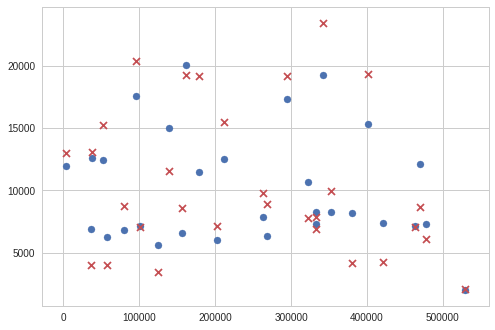

In [0]:
#Creating pandas dataframe from numpy array

df = pd.DataFrame({'Predictions':some_predictions,'Actual':some_labels})
scatter(df.index,some_predictions,marker='o', c='b')
scatter(df.index,some_labels,marker='x', c='r')
plt.figure(); 
# df.plot(); 
# plt.legend(loc='best')

### Let’s train a **DecisionTreeRegressor.** This is a powerful model, capable of finding complex nonlinear relationships in the data.

In [0]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor() 
tree_reg.fit(X_train,y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Let's measure the DecisionTreeRegressor model's RMSE...

In [0]:
Calculate_RMSE(X_train,y_train,tree_reg)

0.0

In [0]:
Calculate_RMSE(X_test,y_test,tree_reg)

3650.902222341959


###Wow, RMSE = 0 for the training set?  Really??!! But the RMSE for the test set is 3651, which is *higher* than what we calculated for the Linear Regression. Let's perform some further tests to determine whether the DecisionTreeRegressor model is badly overfitting the training set.

A great strategy is to use Scikit-Learn’s **cross-validation** feature. The following code performs a K-fold cross-validation: it randomly splits the training set into 3 distinct subsets called folds, then it trains and evaluates the Decision Tree model 3 times, picking a different fold for evaluation every time and training on the other 2 folds.  We have decided on 3 folds in order to speed up the computation time.  The result is an array containing the 3 evaluation scores:

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,X_train,y_train,scoring="neg_mean_squared_error", cv=3)
tree_rmse_scores = np.sqrt(-scores)

In [0]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
  

In [0]:
display_scores(tree_rmse_scores) 

NameError: ignored

### Based on these scores, it looks like the DecisionTreeRegressor performs worse than the Linear Regression.

Let's try one more model: the **RandomForestRegressor**. Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. **Building a model on top of many other models is called Ensemble Learning , and it is often a great way to push ML algorithms even further.**


In [0]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state = 42)
forest_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
train_set_RSME = Calculate_RMSE(X_train,y_train,forest_reg)
print(train_set_RSME)
forest_reg.score(X_train,y_train)    # R-squared for the train set

1166.7859226294356


0.9451156729733368

### Perform a K-fold cross-validation on the training set with K=3

In [0]:
scores = cross_val_score(forest_reg,X_train,y_train,scoring="neg_mean_squared_error", cv=3)
forest_rmse_scores = np.sqrt(-scores)

In [0]:
display_scores(forest_rmse_scores)  

### Now, let's fine tune the Random Forest model by doing a 'GridSearchCV' on the hyperparameters.

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# train across 3 folds, that's a total of (12+6)*3 = 54 rounds of training 

grid_search = GridSearchCV(forest_reg, param_grid, cv=3,scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)